<a href="https://colab.research.google.com/github/HugoStigletz/Data-Analytics-Portfolio/blob/main/Titanic_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Final Project

### Predicting Survival on the *Titanic*

The final project is intended to simulate participation in a Kaggle competition. Your challenge is to build the most accurate model for predicting which passangers would survive the sinking of the *Titanic*. The ***Titanic Machine Learning Final Project.ipynb*** Colab notebook provides some guidance for tackling the project and suggests some things to think about as you get started. However, many of the model-building decisions are left up to you. 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

### Build a Pipeline for a Kaggle Competition!

Kaggle was started in 2010 as a platform for machine learning competitions, which aim to identify how best to optimize supervised learning problems. These initiatives offer a two-way benefit. They help companies improve their internal algorithms and they provide prospective data professionals opportunities to prove their worth.

Though Kaggle usually has a singular aim of maximizing a specific metric, the idea of finding the best possible algorithm and furthermore optimizing its hyperparameters is the daily task of a data scientist. Moreover, success in Kaggle can be great for a future resume (since your information is saved on their site).

Obviously, the timeframe for this lesson is not realistic in terms of a typical Kaggle workflow, as competitors spend weeks or even months optimizing every piece of an algorithm they can. However, you can get started with preliminary testing and use these principles to enter your own Kaggle competitions in the future!

# Step 1: Importing Libraries

It is best practice to import all libraries and packages early in the process.

You'll probably want to import Pandas plus some packages from scikit-learn.

| Type | Path | Regression | Classification |
| --- | --- | --- | --- |
| **Linear Models** | `sklearn.linear_model` | `LinearRegression` | `LogisticRegression` |
|  |  |`Ridge` | `RidgeClassifier` |
|  |  |`Lasso` |  |
| **K Nearest Neighbors** | `sklearn.neighbors` | `KNeighborsRegressor` | `KNeighborsClassifier` |
| **Support Vector Machines** | `sklearn.svm.` | `SVR` | `SVC` |
| **Naive Bayes** |  `sklearn.naive_Bayes` |  |`CategoricalNB` (Categorical) |
|  |  |  | `MultinomialNB` (Sentiment Analysis) |
| **Decision Trees** | `sklearn.tree` | `DecisionTreeRegressor` | `DecisionTreeClassifier` |
| **Ensemble - Random Forests** | `sklearn.ensemble` | `RandomForestRegressor` | `RandomForestClassifier`
| **Ensemble - Boosting** | `sklearn.ensemble` | `AdaBoostRegressor` | `AdaBoostClassifier` |
|  | `sklearn.ensemble` | `GradientBoostRegressor` | `GradientBoostClassifier` |



| Type | Path | Package |
| --- | --- | --- |
| Preprocessing | `sklearn.preprocessing` | `StandardScaler` |
| |`sklearn.preprocessing` | `MinMaxScaler` |
| |`sklearn.preprocessing` | `MaxAbsScaler` |
| Model Selection - Splitting| `sklearn.model_selection` | `train_test_split` |
| Model Selection - Grid Search | `sklearn.model_selection` | `GridSearchCV` |
| Model Selection - Scoring | `sklearn.model_selection` | `cross_val_score` |
| Metrics | `sklearn.metrics` | `confusion_matrix` |


**Note**: Use comments in your code and text blocks to explain your decisions and results.




In [118]:
#Step 1 Not entirly sure what I'll be using, so I'll bring over most of what we used throughout the course
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn import cluster, metrics
from sklearn import datasets
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

#Step 2:  Load the `Titanic.csv` Data
You may want to refer back to one of your previous Colab notebooks to copy the Google Import code.

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [119]:
#Step 2
Titanic = pd.read_csv('/content/Titanic.csv')

Titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [120]:
# Go through the dataset and understand it's values

In [121]:
Titanic.shape

(891, 12)

In [122]:
Titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [123]:
Titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [124]:
Titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [125]:
Titanic['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [126]:
Titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [127]:
Titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [128]:
Titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [129]:
Titanic['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [130]:
Titanic['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [131]:
Titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [132]:
Titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [133]:
Titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [134]:
Titanic[["Fare", "Survived"]].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
...,...,...
103,15.5500,0.0
180,47.1000,0.0
179,46.9000,0.0
178,42.4000,0.0


In [135]:
Titanic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [136]:
Titanic[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [137]:
Titanic[Titanic['Parch']==6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S


In [138]:
Titanic[Titanic['Parch']==5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [139]:
Titanic[Titanic['Parch']==4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.900,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.900,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.000,C23 C25 C27,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S


In [140]:
Titanic[Titanic['Parch']==3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C


#Step 3: Split the Data

The next step is to separate the target column from the feature matrix and perform a train/test split. 

*   What is the target and what are the features in the data?
*   Are there any features that you want to drop?
*   Is there any feature engineering that you need to do?

**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In [141]:
#The first letter of the Cabin can help indicate what what of the ship they were on. Which will help determine their class better

Titanic['Cabin'].fillna('Missing',inplace = True)
Titanic['Cabin'] = Titanic['Cabin'].astype(str).str[0]
Titanic.groupby(['Cabin'])['Survived'].mean().sort_values()
labels = Titanic.groupby(['Cabin'])['Survived'].mean().sort_values().index
label_two = {k:i for i,k in enumerate (labels ,0)}
Titanic['Cabin_ordinal_label'] = Titanic['Cabin'].map(label_two)
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ordinal_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,6
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,M,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,4


In [142]:
# The titles of the people on the ship can indicate their sex, marriage staus, and class

Titanic['Title'] = [i.split(',')[1].split('.')[0].strip() for i in Titanic['Name']]


In [143]:
Titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [144]:
# Classifing the Upper Class as VIP and the different types of female titles

def title_converted(feature):
    result = ''
    if feature in ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Master','Col', 'Rev', 'Dona', 'Dr']:
        result = 'VIP'
    elif feature in ['Ms', 'Mlle']:
        result = 'Miss'
    elif feature == 'Mme':
        result = 'Mrs'
    else:
        result = feature
    return result

In [145]:
Titanic['Title'].map(title_converted)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     VIP
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [146]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ordinal_label,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,4,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,4,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1,Mr


In [147]:
# I'm going to drop these two columns as they don't provide any predictive or helpful information about survival rates

df1 = Titanic.drop(['Ticket','PassengerId'], axis=1)

df1.head(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ordinal_label,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,M,S,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,4,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,M,S,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,4,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,M,S,1,Mr
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,M,Q,1,Mr
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E,S,7,Mr
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,M,S,1,Master
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,M,S,1,Mrs
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,M,C,1,Mrs


In [148]:
df1.isnull().sum()

Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                    177
SibSp                    0
Parch                    0
Fare                     0
Cabin                    0
Embarked                 2
Cabin_ordinal_label      0
Title                    0
dtype: int64

In [149]:
# Replace the missing age values with the average age of sex

mean_age = df1.groupby(['Sex'])['Age'].mean()

mean_age

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [150]:
df1['Age'] = np.where(df1['Sex']=='male',31,28)
df1['Age'].fillna(30,inplace=True)

In [151]:
# And fill in the two missing Embarked rather than droping the rows

df1['Embarked'].fillna(df1['Embarked'].mode()[0],inplace=True)

In [152]:
df1.isnull().sum()

Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Cabin                  0
Embarked               0
Cabin_ordinal_label    0
Title                  0
dtype: int64

In [153]:
df1.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ordinal_label,Title
0,0,3,"Braund, Mr. Owen Harris",male,31,1,0,7.2500,M,S,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,28,1,0,71.2833,C,C,4,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,28,0,0,7.9250,M,S,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,28,1,0,53.1000,C,S,4,Mrs
4,0,3,"Allen, Mr. William Henry",male,31,0,0,8.0500,M,S,1,Mr
5,0,3,"Moran, Mr. James",male,31,0,0,8.4583,M,Q,1,Mr
6,0,1,"McCarthy, Mr. Timothy J",male,31,0,0,51.8625,E,S,7,Mr
7,0,3,"Palsson, Master. Gosta Leonard",male,31,3,1,21.0750,M,S,1,Master
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,28,0,2,11.1333,M,S,1,Mrs
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,28,1,0,30.0708,M,C,1,Mrs


#Step 4: Clean and Preprocess the Data

Use the code block below to clean and preprocess your data. Some considerations you may want to think about include the following:  
*  Are there any missing values that need to be imputed?
*  Do you need to encode any categorical features?
*  Do you need to standardize any quantitative features?
 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In [154]:
# I've already done some of this in step 3. I can still do more feature engineering with Family size

In [155]:
# In the very first course of the program Melisa Ingrid show'd us this data set and stated that those who were alone died more often. 

df1['Family_size'] = df1['Parch'] + df1['SibSp']+1

In [156]:
# Categorizing family by size

def category_family_size(size):
    category = ''
    if (size<=1):
        category = 'Alone'
    elif (size <= 4):
        category = 'Family'
    else:
        category = 'Group'
    return category

In [157]:
df1['Family_group'] = df1['Family_size'].apply(category_family_size)

In [158]:
df1.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ordinal_label,Title,Family_size,Family_group
0,0,3,"Braund, Mr. Owen Harris",male,31,1,0,7.2500,M,S,1,Mr,2,Family
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,28,1,0,71.2833,C,C,4,Mrs,2,Family
2,1,3,"Heikkinen, Miss. Laina",female,28,0,0,7.9250,M,S,1,Miss,1,Alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,28,1,0,53.1000,C,S,4,Mrs,2,Family
4,0,3,"Allen, Mr. William Henry",male,31,0,0,8.0500,M,S,1,Mr,1,Alone
5,0,3,"Moran, Mr. James",male,31,0,0,8.4583,M,Q,1,Mr,1,Alone
6,0,1,"McCarthy, Mr. Timothy J",male,31,0,0,51.8625,E,S,7,Mr,1,Alone
7,0,3,"Palsson, Master. Gosta Leonard",male,31,3,1,21.0750,M,S,1,Master,5,Group
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,28,0,2,11.1333,M,S,1,Mrs,3,Family
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,28,1,0,30.0708,M,C,1,Mrs,2,Family


In [159]:
# I tried to use get dummies to do this but couldn't get it to work

df1.Sex=df1.Sex.map({'female':0, 'male':1})

In [160]:
# I'm also going to drop Embarked	and Cabin_ordinal_label. I don't feel that I can use them

Clean_Data = df1.drop(['Embarked','Cabin_ordinal_label'], axis=1)

Clean_Data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Title,Family_size,Family_group
0,0,3,"Braund, Mr. Owen Harris",1,31,1,0,7.2500,M,Mr,2,Family
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,28,1,0,71.2833,C,Mrs,2,Family
2,1,3,"Heikkinen, Miss. Laina",0,28,0,0,7.9250,M,Miss,1,Alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,28,1,0,53.1000,C,Mrs,2,Family
4,0,3,"Allen, Mr. William Henry",1,31,0,0,8.0500,M,Mr,1,Alone
5,0,3,"Moran, Mr. James",1,31,0,0,8.4583,M,Mr,1,Alone
6,0,1,"McCarthy, Mr. Timothy J",1,31,0,0,51.8625,E,Mr,1,Alone
7,0,3,"Palsson, Master. Gosta Leonard",1,31,3,1,21.0750,M,Master,5,Group
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,28,0,2,11.1333,M,Mrs,3,Family
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,28,1,0,30.0708,M,Mrs,2,Family


#Step 5: Build the Baseline Model

Ideally, you will want to set a baseline algorithm to build off of. The most logical start is *linear regression* for *regression* and *logistic regression* for *classification*, as they are the basis for their respective algorithms.

Once you have the baseline set, you will want to choose an algorithm that surpasses the baseline.

Select a baseline model and fit it to your data.

**Note**: Use comments in your code and text blocks to explain your decisions and results.



In [161]:
y = Clean_Data[['Survived']]
X = Clean_Data[['Pclass','Sex','Age','SibSp','Parch','Fare','Family_size']]

In [162]:
# Split the data into a training/validation dataset and a test dataset

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [163]:
#  Split the training/validation dataset into a training set and validation set

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42)

In [164]:
# Build a pipeline that will impute and standardize the data and fit a logistic regression model

pipe_std = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
('scaler', StandardScaler()),
('log_reg', LogisticRegression(random_state=0))])

In [165]:
# Had to go back and covert sex

Clean_Data['Sex'].unique()

array([1, 0])

In [166]:
# Fit the pipeline to the training data and calculate the model accuracy

pipe_std.fit(X_train, y_train)
train_accuracy_std = pipe_std.fit(X_train, y_train)
train_accuracy_std

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=0))])

In [167]:
X_val.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Family_size
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,2.408072,0.690583,30.071749,0.470852,0.327354,24.822552,1.798206
std,0.788045,0.463293,1.389880,1.060258,0.774315,33.129878,1.527406
min,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,28.000000,0.000000,0.000000,7.925000,1.000000
50%,3.000000,1.000000,31.000000,0.000000,0.000000,13.000000,1.000000
75%,3.000000,1.000000,31.000000,1.000000,0.000000,26.125000,2.000000
max,3.000000,1.000000,31.000000,8.000000,6.000000,263.000000,11.000000


In [168]:
y_val.describe()

,Survived
count,223.000000
mean,0.367713
std,0.483267
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## **Standardize the data**

In [169]:
std = StandardScaler()

In [170]:
X_train_std_ = std.fit_transform(X_train)

In [171]:
X_train_std = pd.DataFrame(X_train_std_)

In [172]:
(round(X_train_std.describe(),2))

,0,1,2,3,4,5,6
count,445.00,445.00,445.00,445.00,445.00,445.00,445.00
mean,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.55,-1.33,-1.33,-0.48,-0.49,-0.61,-0.56
25%,-0.35,-1.33,-1.33,-0.48,-0.49,-0.48,-0.56
50%,0.84,0.75,0.75,-0.48,-0.49,-0.37,-0.56
75%,0.84,0.75,0.75,0.33,-0.49,-0.01,0.01
max,0.84,0.75,0.75,5.97,5.72,8.17,5.10


#Step 6: Evaluate the Baseline Model

Use cross-validation to calculate the appropriate model evaluation metric. 

Is your model doing a good job fitting the data?  

If you have ideas for how to improve your model fit, go back and make those changes to earlier steps.

**Note**: Use comments in your code and text blocks to explain your decisions and results.


In [173]:
# Build a pipeline that will impute and standardize the data and fit KNN with k=5

pipe = Pipeline(
    [('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(random_state=0))]
    )

In [174]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=0))])

In [175]:
scores = cross_val_score(pipe, X_train, y_train, cv=5);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [176]:
scores.mean()

0.7865168539325842

In [177]:
scores.std()

0.018801348910878094

In [178]:
scores

array([0.7752809 , 0.80898876, 0.80898876, 0.76404494, 0.7752809 ])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

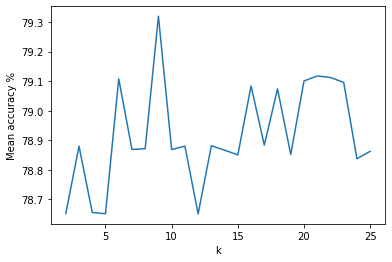

In [179]:
k = list(range(2,26))
mean_accuracy = []

for i in k:
  scores = cross_val_score(pipe, X_train, y_train, cv=i)
  mean_accuracy.append(scores.mean())


k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()


In [180]:
test_accuracy = pipe.score(X_test, y_test)

In [181]:
test_accuracy

0.7937219730941704

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

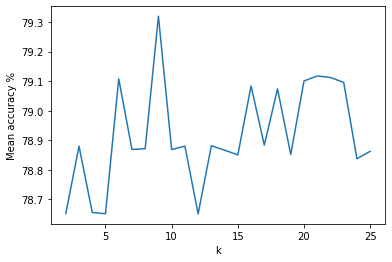

,k,std accuracy,mean accuracy
0,2,0.176746,78.652083
1,3,2.045129,78.880223
2,4,1.253659,78.655888
3,5,1.880135,78.651685
4,6,3.137736,79.108108
5,7,2.108989,78.869048
6,8,2.206106,78.871753
7,9,4.593927,79.319728
8,10,4.348846,78.868687
9,11,4.889418,78.880266


In [182]:
k = list(range(2,26))
mean_accuracy = []
std_accuracy = []

for i in k:
  scores = cross_val_score(pipe, X_train, y_train, cv=i)
  mean_accuracy.append(scores.mean())
  std_accuracy.append(scores.std())

k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)
std_accuracy_df = pd.DataFrame(std_accuracy)*100
std_accuracy_df.rename({0:'std accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, std_accuracy_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()

to_plot.head(30)

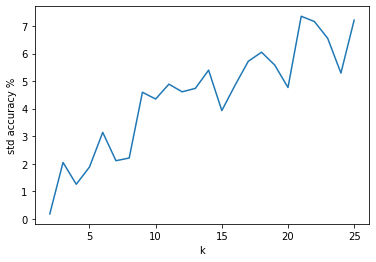

,k,std accuracy,mean accuracy
0,2,0.176746,78.652083
1,3,2.045129,78.880223
2,4,1.253659,78.655888
3,5,1.880135,78.651685
4,6,3.137736,79.108108
5,7,2.108989,78.869048
6,8,2.206106,78.871753
7,9,4.593927,79.319728
8,10,4.348846,78.868687
9,11,4.889418,78.880266


In [183]:
plt.plot(to_plot['k'], to_plot['std accuracy'])
plt.xlabel('k')
plt.ylabel('std accuracy %')
plt.show()

to_plot.head(30)

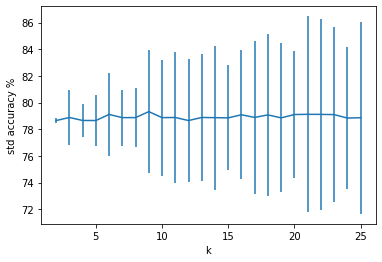

,k,std accuracy,mean accuracy
0,2,0.176746,78.652083
1,3,2.045129,78.880223
2,4,1.253659,78.655888
3,5,1.880135,78.651685
4,6,3.137736,79.108108
5,7,2.108989,78.869048
6,8,2.206106,78.871753
7,9,4.593927,79.319728
8,10,4.348846,78.868687
9,11,4.889418,78.880266


In [184]:
plt.errorbar(to_plot['k'], to_plot['mean accuracy'], yerr=to_plot['std accuracy'])
plt.xlabel('k')
plt.ylabel('std accuracy %')
plt.show()

to_plot.head(30)

# Step 7: Fit the Data to at Least One Other Model

Select one (or more) other appropriate model and use it to model the data. Calculate the cross-validation accuracy of each model. 

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [185]:
Other_Model = df1.drop(['Embarked','Cabin_ordinal_label'], axis=1)

Other_Model.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Title,Family_size,Family_group
0,0,3,"Braund, Mr. Owen Harris",1,31,1,0,7.2500,M,Mr,2,Family
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,28,1,0,71.2833,C,Mrs,2,Family
2,1,3,"Heikkinen, Miss. Laina",0,28,0,0,7.9250,M,Miss,1,Alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,28,1,0,53.1000,C,Mrs,2,Family
4,0,3,"Allen, Mr. William Henry",1,31,0,0,8.0500,M,Mr,1,Alone
5,0,3,"Moran, Mr. James",1,31,0,0,8.4583,M,Mr,1,Alone
6,0,1,"McCarthy, Mr. Timothy J",1,31,0,0,51.8625,E,Mr,1,Alone
7,0,3,"Palsson, Master. Gosta Leonard",1,31,3,1,21.0750,M,Master,5,Group
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,28,0,2,11.1333,M,Mrs,3,Family
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,28,1,0,30.0708,M,Mrs,2,Family


In [186]:
# 10.7.1
y = Clean_Data[['Survived']]
X = Clean_Data[['Pclass','Sex','Age','SibSp','Parch','Cabin','Title','Fare','Family_size','Family_group']]

In [187]:
tree1 = Pipeline(
    [('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42 ))]
    )

In [188]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=0))])

In [189]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


93.03

In [190]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

93.03

In [191]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


78.65

In [192]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


84.27

In [193]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


79.33

# Step 8: Evaluate Your Best Model

Evaluate your best model using the test set. 

*   Which model fit the data best?
*   What was the best accuracy you were able to achieve?  

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [194]:
# Step 8

models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,93.03
4,Decision Tree,93.03
0,KNN,84.27
1,Logistic Regression,79.33
3,Naive Bayes,78.65


In [195]:
acc_decision_tree.mean()

93.03

In [196]:
acc_decision_tree.std()

0.0

#Step 9: Final Reporting

Summarize your model building process:  
* How did you identify the model target and features? 

    - The features of the model were selected based on what aspect of each passangers information could be used to group them with other passangers. Creating more unique defining characteristics about the people on board, compared to if they were marked as survived 1 or 0. Helps isolate the defining aspects of their information that determined why they were a 1 or 0.


* What steps did you take to prepare the data for modeling?  

   - First by looking through the data and finding unique information within a cells value, such as Cabin letters and peoples Titles. Also converting boolean values like male and female to 1 and 0. Also dropping columns that had no information that could be used to define a group from the value.


* Which baseline model did you choose and why? How did you evaluate the model's performance?  

  - When building a pipline and basemodel for the first linear model I couldn't get it to work with string values. Having to use only int dtypes resulted in an OK result of about 80% with a std of 0.01. Not terrible but I wanted to use the string columns I created. The extra columns of information are important aspects of what might define a 1 or 0. 


* Which other model(s) did you choose and why? How did you evaluate the model's performace?  

  - I ran five seperate models that we've covered in class, I ran all of their scores and ranked them in order of accuracy.


* What was the best model you developed? How well did the model perform on the test data?

  - I ran a Decision Tree which would allow me to use all my columns of information. The result is a 93% rate.